# EXTERNSHIP WEEK 3 ASSIGNMENT
Abhishek Sebastian 20BEC1118

## Preparation of Files to Our Required Format Style


To Rename Images with label

In [ ]:
import os
import shutil

main_folder = '/content/drive/MyDrive/archive/test_data/test_data'

def rename_images_in_subfolders(folder_path, start_index=1):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    for index, subfolder in enumerate(subfolders, start=start_index):
        images = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith('.jpg')]

        subfolder_name = os.path.basename(subfolder)

        for i, image_path in enumerate(images):
            image_name = f'{subfolder_name}-{i+1}.jpg'
            new_image_path = os.path.join(subfolder, image_name)
            shutil.move(image_path, new_image_path)

        rename_images_in_subfolders(subfolder, start_index=index+1)

rename_images_in_subfolders(main_folder)


To Copy all the images in different folders to one Folder " ALL IMAGES "

In [ ]:
import os
import shutil

main_folder = '/content/drive/MyDrive/archive/test_data/test_data'
target_folder = '/content/drive/MyDrive/archive/train_data/test_images'

def copy_images_to_target_folder(folder_path):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

    for subfolder in subfolders:
        images = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith('.jpg')]

        for image_path in images:
            image_name = os.path.basename(image_path)
            target_image_path = os.path.join(target_folder, image_name)
            shutil.copy2(image_path, target_image_path)

        copy_images_to_target_folder(subfolder)

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

copy_images_to_target_folder(main_folder)


In [ ]:
import os

# Set the path to the image folder
image_folder = '/content/drive/MyDrive/archive/train_data/all_images'

# Count the number of files in the directory
num_files = len([f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))])

print("Number of files:", num_files)

Number of files: 87


>The files amount is very less , hence augmentation is required ( Over Sampling )

## Augmentation of Images

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

# Path to the folder containing the original images
original_folder = '/content/drive/MyDrive/archive/train_data/all_images'

# Path to the new folder for augmented images
new_folder = '/content/drive/MyDrive/archive/train_data/augmented_images'

# Create the new folder if it doesn't exist
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# Create an ImageDataGenerator instance with desired augmentation settings
data_generator = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

# Iterate through each image in the original folder
for filename in os.listdir(original_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        original_image_path = os.path.join(original_folder, filename)

        # Load the original image
        original_image = Image.open(original_image_path)

        # Reshape the image to 4D for compatibility with ImageDataGenerator
        image_array = original_image.resize((256, 256))  # Resize if needed
        image_array = np.array(image_array)
        image_array = np.expand_dims(image_array, axis=0)

        # Generate augmented images
        augmented_images = data_generator.flow(image_array, batch_size=1)

        # Generate 10 augmented versions of the image
        for i, augmented_image_array in enumerate(augmented_images):
            augmented_image = Image.fromarray(np.uint8(augmented_image_array[0]))

            # Extract the name and extension of the original image
            name, extension = os.path.splitext(filename)

            # Generate a unique ID for each augmented image
            image_id = f"augmented_{i}"

            # Construct the new filename
            new_filename = f"{name}_{image_id}{extension}"

            # Get the path for the augmented image
            augmented_image_path = os.path.join(new_folder, new_filename)

            # Save the augmented image with the new filename
            augmented_image.save(augmented_image_path)

            if i == 20:
                break

# Print the path to the augmented images folder
print("Augmented images saved in:", new_folder)



Augmented images saved in: /content/drive/MyDrive/archive/train_data/augmented_images


## Training

In [ ]:
import os

# Set the path to the image folder
image_folder = '/content/drive/MyDrive/archive/train_data/augmented_images'

# Count the number of files in the directory
num_files = len([f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))])

print("Number of files:", num_files)


Number of files: 1827


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Set the path to the image folder
image_folder = '/content/drive/MyDrive/archive/train_data/augmented_images'
# Preprocessing and label extraction
image_size = (150, 150)  # Set the desired image size
labels = []

# Load and preprocess the images
images = []
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        label = filename.split('-')[0]
        labels.append(label)

        # Read the image and resize using the thumbnail option
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        thumbnail = cv2.resize(image, image_size, interpolation=cv2.INTER_AREA)
        thumbnail = thumbnail / 255.0  # Normalize the image
        images.append(thumbnail)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Perform one-hot encoding on the labels
unique_labels = np.unique(labels)
label_map = {label: idx for idx, label in enumerate(unique_labels)}
encoded_labels = [label_map[label] for label in labels]
one_hot_labels = to_categorical(encoded_labels)




In [ ]:
np.unique(labels)

array(['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'hilpig',
       'himbul', 'himgri', 'indvul', 'jglowl'], dtype='<U6')

In [ ]:

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build a simplified CNN model with one dropout layer
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))  # Add dropout layer with 25% dropout rate
model.add(Dense(len(unique_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=10)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])




Epoch 1/25
30/30 [==============================] - 22s 592ms/step - loss: 3.4019 - accuracy: 0.4082 - val_loss: 0.8342 - val_accuracy: 0.8000
Epoch 2/25
30/30 [==============================] - 16s 540ms/step - loss: 0.5578 - accuracy: 0.8614 - val_loss: 0.2999 - val_accuracy: 0.9030
Epoch 3/25
30/30 [==============================] - 17s 577ms/step - loss: 0.1801 - accuracy: 0.9678 - val_loss: 0.1893 - val_accuracy: 0.9576
Epoch 4/25
30/30 [==============================] - 27s 901ms/step - loss: 0.0754 - accuracy: 0.9946 - val_loss: 0.1417 - val_accuracy: 0.9758
Epoch 5/25
30/30 [==============================] - 18s 608ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9939
Epoch 6/25
30/30 [==============================] - 18s 605ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0883 - val_accuracy: 0.9939
Epoch 7/25
30/30 [==============================] - 19s 608ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9939

In [ ]:
# Assuming you have a trained model object named "model"
model.save("/content/drive/MyDrive/archive/modelV1.h5")


## Testing

23/23 [==============================] - 6s 247ms/step
Test Accuracy: 0.9986320109439124


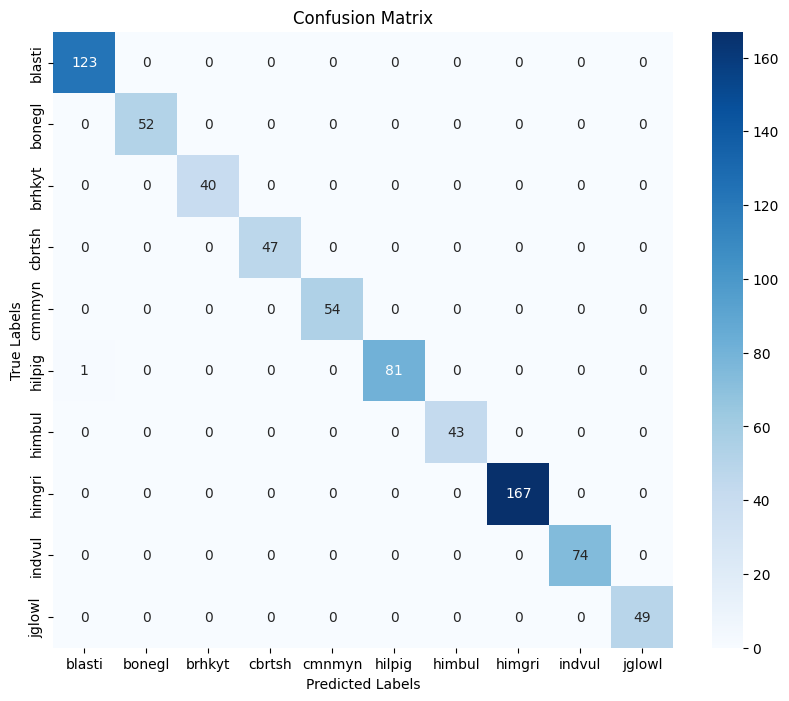

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Evaluate test accuracy
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_test_labels, y_pred_labels)
print('Test Accuracy:', test_accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()